# Aufgabenblatt 9

<p style="background-color:#f6f6f6;border-left:5px solid red;padding:0.6em;box-sizing:border-box;">
<strong>Lernziele:</strong><br/>
    In dieser beschäftigen wir uns mit der gausschen Normalverteilung, sowie dem Zentralen Grenzwertsatz.
</p>

<p style="background-color:#f6f6f6;border-left:5px solid blue;padding:0.6em;box-sizing:border-box;">
<strong>Wichtigste neuen Funktionen für diese Übung:</strong><br/>
    Dies sind die wichtigsten Funktionen die sie während dieser Übung benötigen:<br>
    Die jeweilige Syntax beschreibt eine examplarische Verwendung. Der Funktionsname ist jeweils ein Link zur offiziellen Dokumentation, welche alle Argumente der Funktion darlegt und ihre Funktionalität beschreibt. <br>
    <b>Funktionen zur statistischen Analyse: </b><br>
    <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html">numpy.random.normal(...)</a> Zieht einen Zufallswert aus einer Gusschen Normalverteilung.<br>
    <a href="https://numpy.org/doc/stable/reference/random/generated/numpy.random.choice.html">numpy.random.choice(...)</a> Wählt zufällige Elemente aus einem Array aus.<br>
    <a href="https://numpy.org/doc/stable/reference/generated/numpy.squeeze.html">numpy.squeeze(...)</a> Entfernt alle singulären Dimensionen eines numpy Arrays.<br>
</p>

In [28]:
import numpy as np
import matplotlib.pyplot as plt

In [29]:
def PMF(data, resolution):
    # Definieren der Bins und Berechnen des Histogramms
    # Wir addieren resolution / 1000 zur Obergrenze, um sicherzustellen, dass der letzte Wert auch im Array ist.
    bin_centers = np.arange(np.min(data), np.max(data) + resolution / 1000, resolution)
    bin_edges = np.linspace(bin_centers[0] - resolution / 2,
                            bin_centers[-1] + resolution / 2,
                            len(bin_centers) + 1)
    
    hist, _ = np.histogram(data, bin_edges)
    
    # Normieren
    px = hist / np.sum(hist)
    
    return bin_centers, px

## Aufgabe 0

In dieser Aufgabe werden wir uns mit der Gausschen Normalverteilung vertraut machen. Dazu werden wir Daten analysieren, die aus einer Normalverteilung stammen, und diese plotten.\
Zur Erinnerung: Die Wahrscheinlichkeitsdichtefunktion der Gaussche Normalverteilung ist definiert als $$ f(x) = {1 \over \sqrt{2\pi\sigma^2}} e^{-{1 \over 2}{(x-\mu)^2 \over \sigma^2}}$$

## a)
Ihre Aufgabe besteht darin, eine Funktion zu vervollständigen, die die Wahrscheinlichkeitsmassefunktion (PMF) einer Normalverteilung an den Stellen der Werte im Vektor x zurückgibt. Die Normalverteilung soll dabei einen Mittelwert mu und eine Standardabweichung sigma haben.
\
**Hinweis:** Die Wahrscheinlichkeitsdichtefunktion und die Wahrscheinlichkeitsmassefunktion unterscheiden sich in einem kleinen Detail der Implementierung

In [120]:
np.random.seed(2004)
def normal_pdf(x, mu, sigma):
    return 1.0/np.sqrt(2*np.pi*sigma**2)*np.exp(-0.5*(x-mu)**2/sigma**2)

def normal_pmf(x, mu, sigma, binsize):
    #YOUR CODE HERE
    return normal_pdf(x, mu, sigma) * binsize


## b)
Ziehen Sie 1000 Werte aus einer Normalverteilung (Sie können dazu die Funktion numpy.random.normal verwenden). Plotten Sie das Histogramm dieser Zufallswerte und überlagern Sie einen Plot der entsprechenden PMF mit den selben Parametern. Zur Darstellung der PMF der Zufallswerte können Sie die oben definierte PMF-Funktion verwenden.\
\
Ändern sie die Anzahl der Zufallswerte die sie für ihr Histogram verwenden um ein Gefühl zu erhalten, wie die Verteilung mit zunehmender Anzahl an Datenpunkten immer besser die Normalverteilung abbildet.\

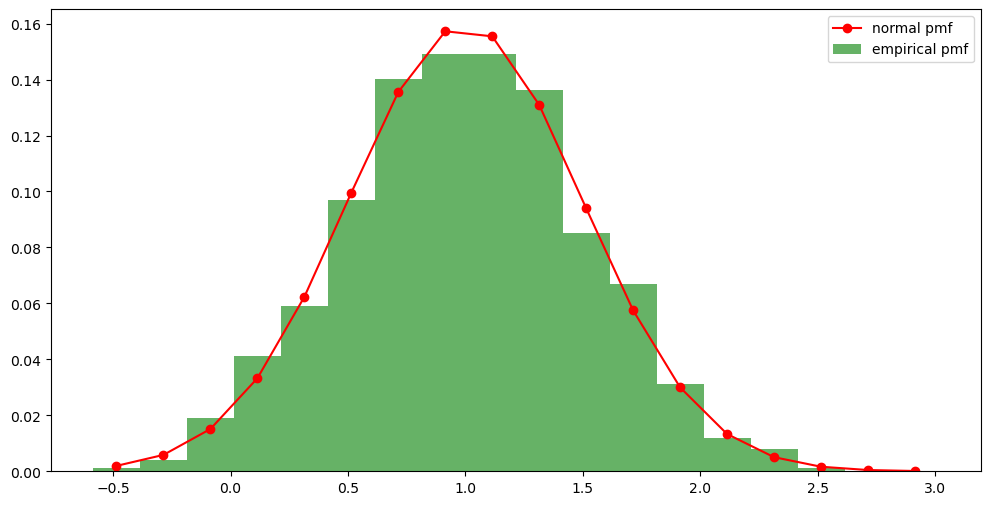

In [121]:
# YOUR CODE HERE

def show_pmf(x, binsize, mu=0, sigma=1, ax=None, show_normal_pmf=True):
    x_bin, px = PMF(x, binsize)
    if ax is None:
        _, ax = plt.subplots(1, 1, figsize=(12, 6))
    ax.bar(x_bin, px, width=binsize, alpha=0.6, color='g', label='empirical pmf')
    if show_normal_pmf:
        ax.plot(x_bin, normal_pmf(x_bin, mu, sigma, binsize), '-or', label='normal pmf')
    ax.legend()


N=1000
mu=1.0
sigma=0.5
x = np.random.normal(mu, sigma, N)
binsize = 0.2
show_pmf(x, binsize, mu, sigma)

## Aufgabe 1: Zentraler Grenzwertsatz

Der zentrale Grenzwertsatz ist ein wichtiges Resultat der Wahrscheinlichkeitstheorie. Dieses besagt, wie in der Vorlesung vermittelt, das unter der Annahme von unabhängigen und identisch verteilten Zufallsvariablen, die Verteilung der Mittelwerte dieser Stichproben sich einer Gausschen Normalverteilung annähen werden. Dies ist unabhängig von der Verteilung der unterliegenden Daten.
In der Datei 'NASA_small_body_data_period.txt' sind die Umlaufzeiten der meisten bekannten kleineren Objekte in unserem Sonnensystem enthalten. Im folgenden werden wir uns mit derer Verteilung beschäftigen. 

## a)

Laden sie den Datensatz 'NASA_small_body_data_period.txt' und stellen sie die Verteilung der Umlaufzeiten in einem Plot da. Wie würden sie diese Verteilung beschreiben? Ist diese Verteilung eine Gaussche Normalverteilung? Wenn ja, was ist deren Mittelwert und Standardabweichung? Wenn nein, haben sie eine Idee warum dies nicht der Fall ist?


1738.2348003581021 442.8051834104745


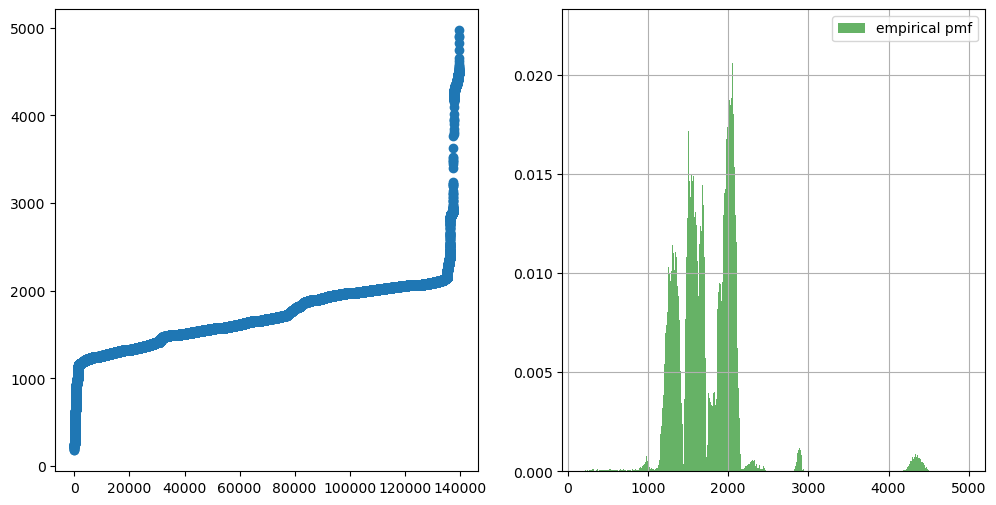

In [122]:
# YOUR CODE HERE
data=np.loadtxt('NASA_small_body_data_period.txt')
fig, ax = plt.subplots(1, 2, figsize=(12, 6))
ax[0].plot(data, 'o')
show_pmf(data, 10,ax=ax[1],show_normal_pmf=False)
ax[1].grid()
print(np.mean(data),np.std(data))

## b)

Im nächsten Schritt möchten wir den zentralen Grenzwertsatz auf diese Daten anwenden. Dazu gehen wir folgendermaßen vor:

1. Ziehen Sie eine Stichprobe mit 500 Objekten aus den gegebenen Daten.
2. Berechnen Sie den Mittelwert dieser Stichprobe und speichern Sie diesen in einem NumPy-Array.
3. Wiederholen Sie dieses Verfahren 250-mal.

Gemäß dem zentralen Grenzwertsatz sollte die Verteilung dieser Mittelwerte der Stichproben sich einer Gaußverteilung annähern.

Um dies zu überprüfen, befolgen Sie das oben genannte Vorgehen. Plotten Sie als nächstes die Verteilung der Mittelwerte der Stichproben mittels eines Histogramms.\

In der Vorlesung haben Sie gelernt, dass der erwartete Mittelwert und die Standardabweichung der Normalverteilung aus den Ursprungsdaten berechnet werden können.\
Tun Sie dies und überlagern Sie diese erwartete Normalverteilung mit dem bereits geplotteten Histogramm.


1738.2348003581021 19.802849817901663 18.70903329604648


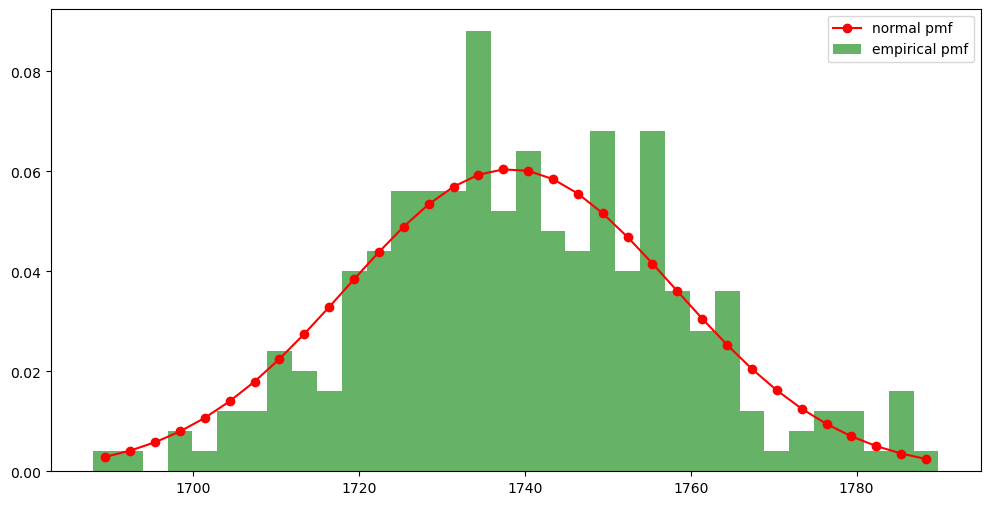

In [160]:
# YOUR CODE HERE
n_samples=500
probe=[np.mean(np.random.choice(data, n_samples)) for _ in range(250)]
binsize=3
mu=np.mean(data)
sigma2=np.var(data)/n_samples
sigma=np.sqrt(sigma2)
print(mu,sigma,np.std(probe))
#show_pmf(probe, binsize, np.mean(probe), np.std(probe))
show_pmf(probe, binsize, mu, sigma)


# c)

Wiederholen Sie dies für den Fall, dass Sie 2, 10, 100, 1000 Werte pro Stichprobe nehmen. Stellen Sie das Ergebnis in einer Abbildung mit 4 Untergrafiken dar. Was fällt dabei auf? Wie verhält sich das Histogramm der Stichproben im Vergleich zur erwarteten Normalverteilung?\
Ändern Sie zusätzlich die Anzahl der Stichproben. Welchen Effekt hat dies?

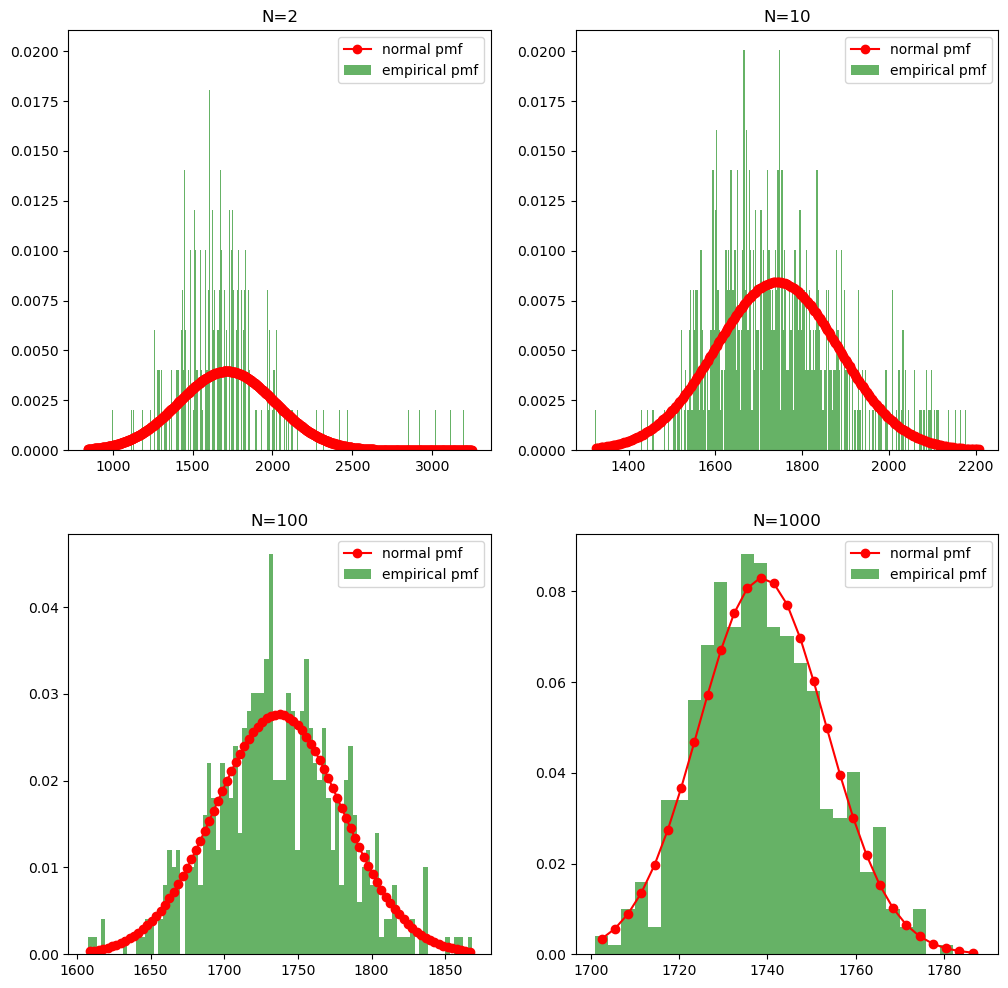

In [136]:
n_samples_list = np.array([2, 10, 100, 1000])
number_of_samples = 500
# YOUR CODE HERE
binsize=3
probes=[[np.mean(np.random.choice(data, choice_size, replace=True)) for _ in range(number_of_samples)] for choice_size in n_samples_list]
fig, axs = plt.subplots(2, 2, figsize=(12, 12))
for i, ax in enumerate(axs.flat):
    if i >= len(n_samples_list):
        ax.axis('off')
        continue
    prb=probes[i]
    show_pmf(prb, binsize, np.mean(prb), np.std(prb), ax=ax, show_normal_pmf=True)
    ax.set_title(f'N={n_samples_list[i]}')

## d)

Um das Ziehen der Stichproben effizienter zu gestalten, wurde der folgende Code geschrieben:

In [125]:
def draw_samples(data, sample_size, number_of_samples):
    start_points = np.random.randint(0, data.size-sample_size, size=(1,number_of_samples))
    drawn_indicess = np.squeeze(np.linspace(start_points, start_points + sample_size-1 ,sample_size))
    sample_data = data[drawn_indicess.astype(int)]
    
    return sample_data

Ziehen Sie 1000 Stichproben, wobei jede Stichprobe aus 5000 Objekten besteht, und plotten Sie die Verteilung der Mittelwerte dieser Stichproben. Was fällt Ihnen dabei auf? Können Sie dieses Verhalten erklären?

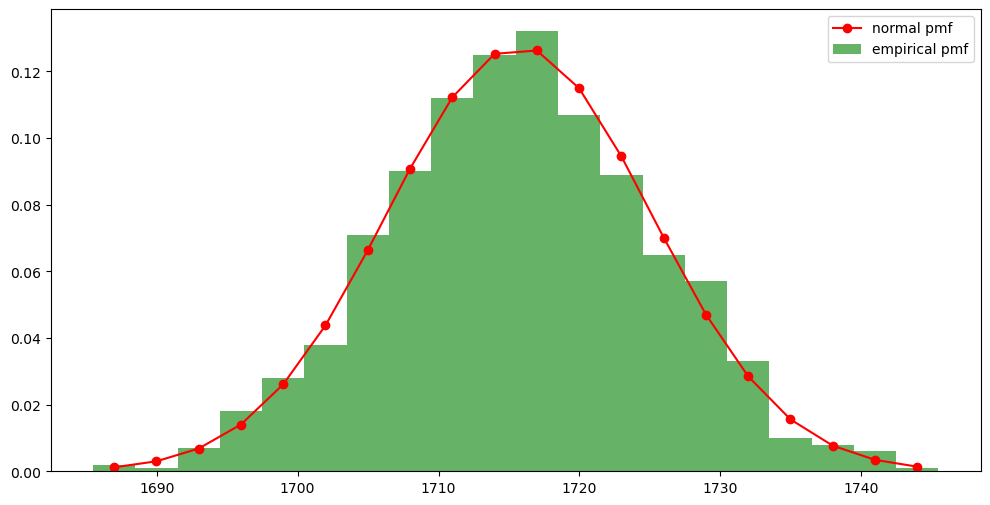

In [137]:
sample_size = 5000
number_of_samples = 1000

# YOUR CODE HERE
big_probe=[np.mean(draw_samples(data, sample_size, number_of_samples)) for _ in range(1000)]


1715.7136741096 9.395379079529274
1738.2348003581021 14.002729393057054


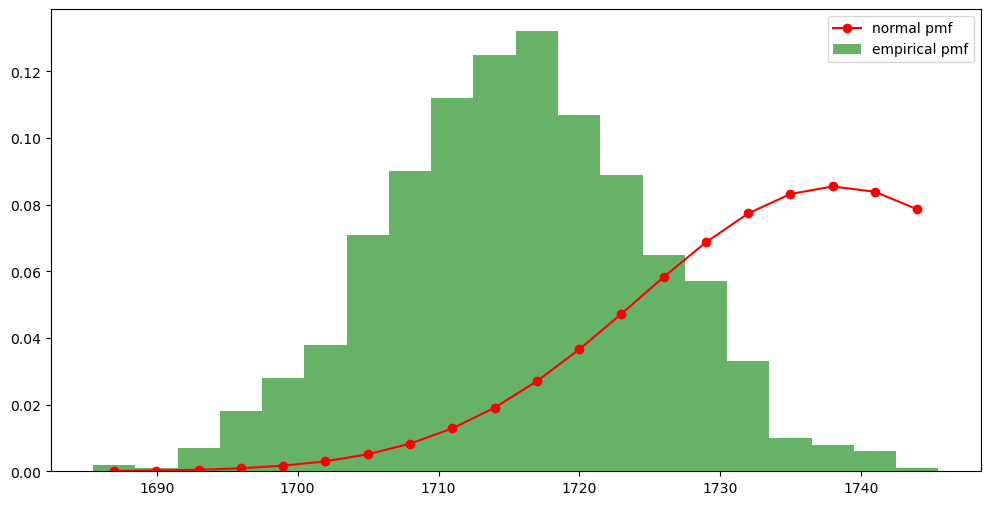

In [156]:
sigma2=np.var(data)/number_of_samples
sigma=np.sqrt(sigma2)
print(np.mean(big_probe),np.std(big_probe))
print(np.mean(data),sigma)

binsize=3
show_pmf(big_probe, binsize, mu, sigma)